(Ablation study on active learning)
### RQ: boundary points still lie in boundaries after dimension reduction?
1. without boundary preserving property
2. with boundary preserving property
3. add boundary points to train decoder(reconstruction)

verify
- adversarial border points lying on boundaries?
- true samples lying on boundaries?

In [1]:
# import modules
from deepvisualinsight.MMS import MMS
from deepvisualinsight import utils
import sys
import os
import numpy as np
import time
import matplotlib.pyplot as plt
import torch
import json
import tensorflow as tf

1. without boundary preserving properties

In [2]:
content_path = "E:\\DVI_exp_data\\RQ1\\withoutB"
sys.path.append(content_path)

from Model.model import *
net = resnet18()
classes = ("airplane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

mms = MMS(content_path, net, 100, 100, 1, 512, 10, classes, cmap="tab10", resolution=400, neurons=256,
          verbose=1, temporal=False, split=-1, advance_border_gen=True, withoutB=True, attack_device="cuda:0")

Finish loading content!


In [3]:
# hyperparameters
EPOCH = 100

In [4]:
# 1. whether adversarial border points lying on boundaries?
# quantitative measure
border_points = mms.get_epoch_border_centers(EPOCH)
preds = mms.get_pred(EPOCH, border_points)
preds = preds + 1e-8

sort_preds = np.sort(preds)
diff = (sort_preds[:, -1] - sort_preds[:, -2]) / (sort_preds[:, -1] - sort_preds[:, 0])

border = np.zeros(len(diff), dtype=np.bool)
border[diff < 0.1] = 1
s = np.sum(border)
s

100%|██████████| 25/25 [00:00<00:00, 105.77it/s]


1596

In [5]:
grid_view, decision_view =mms.get_epoch_decision_view(EPOCH, resolution=400)
grid_view = grid_view.reshape(-1, 2)
decision_view = decision_view.reshape(-1,3)
from sklearn.neighbors import NearestNeighbors
nbs = NearestNeighbors(n_neighbors=1, algorithm="ball_tree").fit(grid_view)

target_samples = border_points[border]
repr_2d = mms.batch_project(target_samples, EPOCH)
_, indices = nbs.kneighbors(repr_2d)
indices = indices.squeeze()
sample_colors = decision_view[indices]

c1 = np.zeros(indices.shape[0], dtype=np.bool)
c1[sample_colors[:,0]>0.85] = 1

c2 = np.zeros(indices.shape[0], dtype=np.bool)
c2[sample_colors[:,1]>0.85] = 1

c3 = np.zeros(indices.shape[0], dtype=np.bool)
c3[sample_colors[:,2]>0.85] = 1
c = np.logical_and(c1,c2)
c=np.logical_and(c, c3)

np.sum(c), len(c), np.sum(c)/len(c)

Computing decision regions ...
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000002C634FEDF28>
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000002C637A80BA8>
Instructions for updating:
Use tf.identity instead.


100%|██████████| 800/800 [00:00<00:00, 6218.14it/s]


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000002C634DD9AC8>


(1108, 1596, 0.6942355889724311)

E:\xianglin\git_space\DeepVisualInsight\deepvisualinsight\MMS.py:1000: MatplotlibDeprecationWarning: Setting the line's pick radius via set_picker is deprecated since 3.3 and will be removed two minor releases later; use set_pickradius instead.
  color=color, zorder=2, picker=mpl.rcParams['lines.markersize'])


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000002C6392FC7B8>
Computing decision regions ...
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000002C6392FC0B8>
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000002C6407F6390>


100%|██████████| 800/800 [00:00<00:00, 5940.65it/s]


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000002C6392F5FD0>


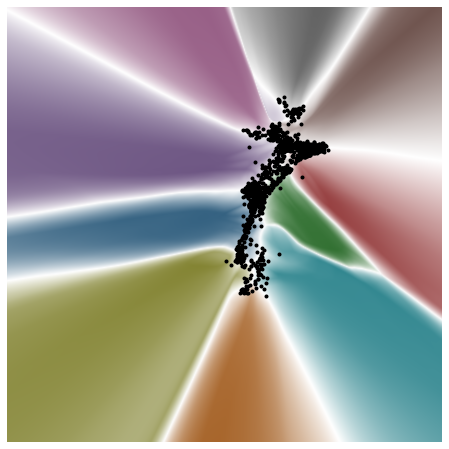

In [6]:
# visualize
img_save_location = os.path.join(mms.content_path, "img")

mms.customize_visualize(EPOCH, target_samples, None, None, None,
                        os.path.join(img_save_location, "RQ_11_{:d}".format(EPOCH)), np.arange(-len(c), 0, 1))

In [53]:
#2. true samples on boundaries

training_data = mms.training_data
train_data = mms.get_representation_data(EPOCH, training_data)

preds = mms.get_pred(EPOCH, train_data)
preds = preds + 1e-8

sort_preds = np.sort(preds)
diff = (sort_preds[:, -1] - sort_preds[:, -2]) / (sort_preds[:, -1] - sort_preds[:, 0])

border = np.zeros(len(diff), dtype=np.bool)
border[diff < 0.1] = 1
s = np.sum(border)
s

100%|██████████| 250/250 [00:00<00:00, 3856.45it/s]


3051

In [54]:
# 2. if point lies on boundary, is the background white?
grid_view, decision_view =mms.get_epoch_decision_view(EPOCH, resolution=400)
grid_view = grid_view.reshape(-1, 2)
decision_view = decision_view.reshape(-1,3)
from sklearn.neighbors import NearestNeighbors
nbs = NearestNeighbors(n_neighbors=1, algorithm="ball_tree").fit(grid_view)

target_samples = train_data[border]
repr_2d = mms.batch_project(target_samples, EPOCH)
_, indices = nbs.kneighbors(repr_2d)
indices = indices.squeeze()
sample_colors = decision_view[indices]

c1 = np.zeros(indices.shape[0], dtype=np.bool)
c1[sample_colors[:,0]>0.85] = 1

c2 = np.zeros(indices.shape[0], dtype=np.bool)
c2[sample_colors[:,1]>0.85] = 1

c3 = np.zeros(indices.shape[0], dtype=np.bool)
c3[sample_colors[:,2]>0.85] = 1
c = np.logical_and(c1,c2)
c=np.logical_and(c, c3)

np.sum(c), len(c), np.sum(c)/len(c)

Computing decision regions ...
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x00000154999B6550>
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000015498A0DD30>


100%|██████████| 800/800 [00:00<00:00, 5108.19it/s]


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001562AE880B8>


(2456, 3051, 0.804981973123566)

E:\xianglin\git_space\DeepVisualInsight\deepvisualinsight\MMS.py:1000: MatplotlibDeprecationWarning: Setting the line's pick radius via set_picker is deprecated since 3.3 and will be removed two minor releases later; use set_pickradius instead.
  color=color, zorder=2, picker=mpl.rcParams['lines.markersize'])


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001549913AAC8>
Computing decision regions ...
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001549913AB00>
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000015498A7AF60>


100%|██████████| 800/800 [00:00<00:00, 4951.49it/s]


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000015498A7ABA8>


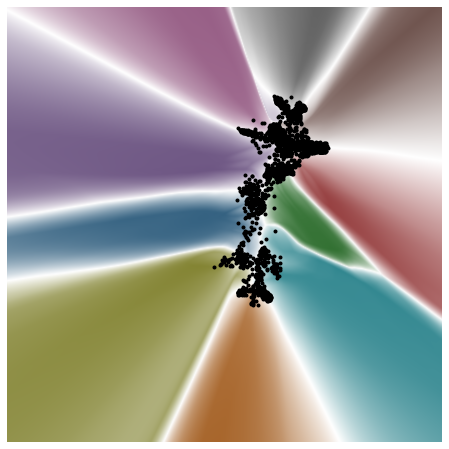

In [55]:
#visualize
img_save_location = os.path.join(mms.content_path, "img")

mms.customize_visualize(EPOCH, train_data[border], None, None, None,
                        os.path.join(img_save_location, "RQ_12_{:d}".format(EPOCH)), np.arange(-s, 0, 1))

In [56]:
# 3. test data

test_data = mms.get_epoch_test_repr_data(EPOCH)

preds = mms.get_pred(EPOCH, test_data)
preds = preds + 1e-8

sort_preds = np.sort(preds)
diff = (sort_preds[:, -1] - sort_preds[:, -2]) / (sort_preds[:, -1] - sort_preds[:, 0])

border = np.zeros(len(diff), dtype=np.bool)
border[diff < 0.1] = 1
s = np.sum(border)
s

100%|██████████| 50/50 [00:00<00:00, 6271.76it/s]


652

In [57]:
# 2. if point lies on boundary, is the background white?
grid_view, decision_view =mms.get_epoch_decision_view(EPOCH, resolution=400)
grid_view = grid_view.reshape(-1, 2)
decision_view = decision_view.reshape(-1,3)
from sklearn.neighbors import NearestNeighbors
nbs = NearestNeighbors(n_neighbors=1, algorithm="ball_tree").fit(grid_view)

target_samples = test_data[border]
repr_2d = mms.batch_project(target_samples, EPOCH)
_, indices = nbs.kneighbors(repr_2d)
indices = indices.squeeze()
sample_colors = decision_view[indices]

c1 = np.zeros(indices.shape[0], dtype=np.bool)
c1[sample_colors[:,0]>0.85] = 1

c2 = np.zeros(indices.shape[0], dtype=np.bool)
c2[sample_colors[:,1]>0.85] = 1

c3 = np.zeros(indices.shape[0], dtype=np.bool)
c3[sample_colors[:,2]>0.85] = 1
c = np.logical_and(c1,c2)
c=np.logical_and(c, c3)

np.sum(c), len(c), np.sum(c)/len(c)

Computing decision regions ...
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001548F25ADA0>
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000015584AF0390>


100%|██████████| 800/800 [00:00<00:00, 5141.95it/s]


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x00000155352D86A0>


(522, 652, 0.8006134969325154)

E:\xianglin\git_space\DeepVisualInsight\deepvisualinsight\MMS.py:1000: MatplotlibDeprecationWarning: Setting the line's pick radius via set_picker is deprecated since 3.3 and will be removed two minor releases later; use set_pickradius instead.
  color=color, zorder=2, picker=mpl.rcParams['lines.markersize'])


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000015584B03BE0>
Computing decision regions ...
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000015584AF1C50>
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000015584A14E80>


100%|██████████| 800/800 [00:00<00:00, 5109.00it/s]


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000015584B035F8>


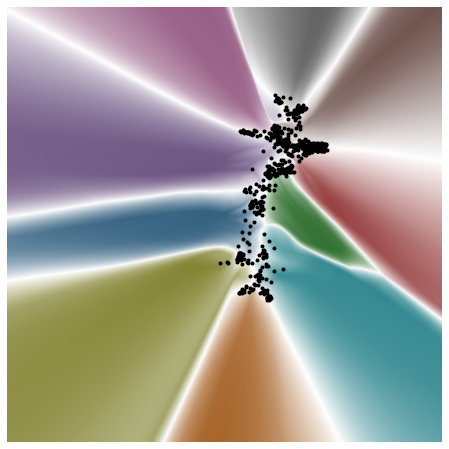

In [58]:
#visualize
img_save_location = os.path.join(mms.content_path, "img")

mms.customize_visualize(EPOCH, test_data[border], None, None, None,
                        os.path.join(img_save_location, "RQ_13_{:d}".format(EPOCH)), np.arange(-s, 0, 1))

In [59]:
sys.path.remove(content_path)

2. with boundary preserving properties

In [2]:
content_path = "E:\\DVI_exp_data\\resnet18_cifar10"
sys.path.append(content_path)

from Model.model import *
net = resnet18()
classes = ("airplane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

mms = MMS(content_path, net, 100, 100, 1, 512, 10, classes, cmap="tab10", resolution=400, neurons=256,
          verbose=1, temporal=False, split=-1, advance_border_gen=True, attack_device="cuda:0")

Finish loading content!


In [5]:
# hyperparameters
EPOCH = 100

In [6]:
# 1. whether adversarial border points lying on boundaries?
# quantitative measure
border_points = mms.get_epoch_border_centers(EPOCH)
preds = mms.get_pred(EPOCH, border_points)
preds = preds + 1e-8

sort_preds = np.sort(preds)
diff = (sort_preds[:, -1] - sort_preds[:, -2]) / (sort_preds[:, -1] - sort_preds[:, 0])

border = np.zeros(len(diff), dtype=np.bool)
border[diff < 0.1] = 1
s = np.sum(border)
s

100%|██████████| 25/25 [00:00<00:00, 6308.36it/s]


1596

In [9]:
preds = mms.get_pred(EPOCH,border_points[border])
preds = np.argmax(preds,axis=1)
preds = np.squeeze(preds)
np.bincount(preds)

100%|██████████| 8/8 [00:00<00:00, 4010.33it/s]


array([296,  16,  51, 396, 137, 417,  52,  34, 179,  18], dtype=int64)

In [63]:
grid_view, decision_view =mms.get_epoch_decision_view(EPOCH, resolution=400)
grid_view = grid_view.reshape(-1, 2)
decision_view = decision_view.reshape(-1,3)
from sklearn.neighbors import NearestNeighbors
nbs = NearestNeighbors(n_neighbors=1, algorithm="ball_tree").fit(grid_view)

target_samples = border_points[border]
repr_2d = mms.batch_project(target_samples, EPOCH)
_, indices = nbs.kneighbors(repr_2d)
indices = indices.squeeze()
sample_colors = decision_view[indices]

c1 = np.zeros(indices.shape[0], dtype=np.bool)
c1[sample_colors[:,0]>0.85] = 1

c2 = np.zeros(indices.shape[0], dtype=np.bool)
c2[sample_colors[:,1]>0.85] = 1

c3 = np.zeros(indices.shape[0], dtype=np.bool)
c3[sample_colors[:,2]>0.85] = 1
c = np.logical_and(c1,c2)
c=np.logical_and(c, c3)

np.sum(c), len(c), np.sum(c)/len(c)

Computing decision regions ...
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000015499A0E630>
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001554BCD87B8>


100%|██████████| 800/800 [00:00<00:00, 5241.99it/s]


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000015567AB1CF8>


(1139, 1596, 0.7136591478696742)

E:\xianglin\git_space\DeepVisualInsight\deepvisualinsight\MMS.py:1000: MatplotlibDeprecationWarning: Setting the line's pick radius via set_picker is deprecated since 3.3 and will be removed two minor releases later; use set_pickradius instead.
  color=color, zorder=2, picker=mpl.rcParams['lines.markersize'])


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001557955C518>
Computing decision regions ...
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x00000155795656A0>
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x00000154989EF780>


100%|██████████| 800/800 [00:00<00:00, 5610.28it/s]


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001549893F6D8>


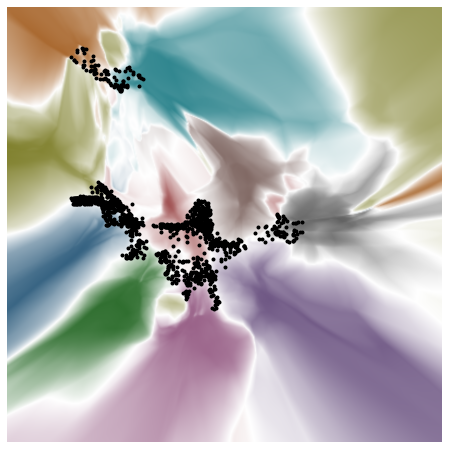

In [64]:
# visualize
img_save_location = os.path.join(mms.content_path, "img")

mms.customize_visualize(EPOCH, target_samples, None, None, None,
                        os.path.join(img_save_location, "RQ_21_{:d}".format(EPOCH)), np.arange(-len(c), 0, 1))

In [65]:
#2. true samples on boundaries

training_data = mms.training_data
train_data = mms.get_representation_data(EPOCH, training_data)

preds = mms.get_pred(EPOCH, train_data)
preds = preds + 1e-8

sort_preds = np.sort(preds)
diff = (sort_preds[:, -1] - sort_preds[:, -2]) / (sort_preds[:, -1] - sort_preds[:, 0])

border = np.zeros(len(diff), dtype=np.bool)
border[diff < 0.1] = 1
s = np.sum(border)
s

100%|██████████| 250/250 [00:00<00:00, 4246.33it/s]


3051

In [66]:
# 2. if point lies on boundary, is the background white?
grid_view, decision_view =mms.get_epoch_decision_view(EPOCH, resolution=400)
grid_view = grid_view.reshape(-1, 2)
decision_view = decision_view.reshape(-1,3)
from sklearn.neighbors import NearestNeighbors
nbs = NearestNeighbors(n_neighbors=1, algorithm="ball_tree").fit(grid_view)

target_samples = train_data[border]
repr_2d = mms.batch_project(target_samples, EPOCH)
_, indices = nbs.kneighbors(repr_2d)
indices = indices.squeeze()
sample_colors = decision_view[indices]

c1 = np.zeros(indices.shape[0], dtype=np.bool)
c1[sample_colors[:,0]>0.85] = 1

c2 = np.zeros(indices.shape[0], dtype=np.bool)
c2[sample_colors[:,1]>0.85] = 1

c3 = np.zeros(indices.shape[0], dtype=np.bool)
c3[sample_colors[:,2]>0.85] = 1
c = np.logical_and(c1,c2)
c=np.logical_and(c, c3)

np.sum(c), len(c), np.sum(c)/len(c)

Computing decision regions ...
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000015498FE2EB8>
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000015499775F60>


100%|██████████| 800/800 [00:00<00:00, 5495.04it/s]


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001549903A7B8>


(2300, 3051, 0.7538511963290724)

E:\xianglin\git_space\DeepVisualInsight\deepvisualinsight\MMS.py:1000: MatplotlibDeprecationWarning: Setting the line's pick radius via set_picker is deprecated since 3.3 and will be removed two minor releases later; use set_pickradius instead.
  color=color, zorder=2, picker=mpl.rcParams['lines.markersize'])


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001548F2C5390>
Computing decision regions ...
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001548DDE2C18>
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000015498A6B6A0>


100%|██████████| 800/800 [00:00<00:00, 5571.64it/s]


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001548F25C550>


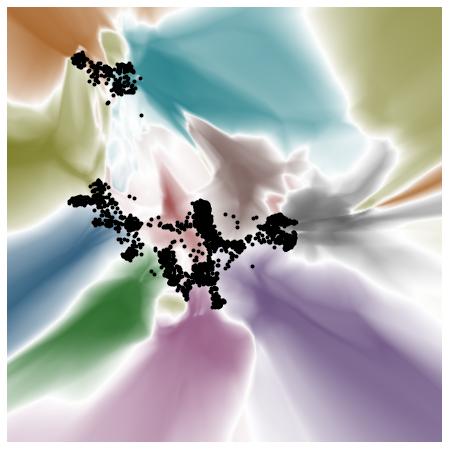

In [67]:
#visualize
img_save_location = os.path.join(mms.content_path, "img")

mms.customize_visualize(EPOCH, train_data[border], None, None, None,
                        os.path.join(img_save_location, "RQ_22_{:d}".format(EPOCH)), np.arange(-s, 0, 1))

In [68]:
# 3. test data
test_data = mms.get_epoch_test_repr_data(EPOCH)

preds = mms.get_pred(EPOCH, test_data)
preds = preds + 1e-8

sort_preds = np.sort(preds)
diff = (sort_preds[:, -1] - sort_preds[:, -2]) / (sort_preds[:, -1] - sort_preds[:, 0])

border = np.zeros(len(diff), dtype=np.bool)
border[diff < 0.1] = 1
s = np.sum(border)
s

100%|██████████| 50/50 [00:00<00:00, 5569.98it/s]


652

In [69]:
# 2. if point lies on boundary, is the background white?
grid_view, decision_view =mms.get_epoch_decision_view(EPOCH, resolution=400)
grid_view = grid_view.reshape(-1, 2)
decision_view = decision_view.reshape(-1,3)
from sklearn.neighbors import NearestNeighbors
nbs = NearestNeighbors(n_neighbors=1, algorithm="ball_tree").fit(grid_view)

target_samples = test_data[border]
repr_2d = mms.batch_project(target_samples, EPOCH)
_, indices = nbs.kneighbors(repr_2d)
indices = indices.squeeze()
sample_colors = decision_view[indices]

c1 = np.zeros(indices.shape[0], dtype=np.bool)
c1[sample_colors[:,0]>0.85] = 1

c2 = np.zeros(indices.shape[0], dtype=np.bool)
c2[sample_colors[:,1]>0.85] = 1

c3 = np.zeros(indices.shape[0], dtype=np.bool)
c3[sample_colors[:,2]>0.85] = 1
c = np.logical_and(c1,c2)
c=np.logical_and(c, c3)

np.sum(c), len(c), np.sum(c)/len(c)

Computing decision regions ...
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000015584A00CF8>
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000015499AEA160>


100%|██████████| 800/800 [00:00<00:00, 4983.36it/s]


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000015584A00390>


(493, 652, 0.7561349693251533)

E:\xianglin\git_space\DeepVisualInsight\deepvisualinsight\MMS.py:1000: MatplotlibDeprecationWarning: Setting the line's pick radius via set_picker is deprecated since 3.3 and will be removed two minor releases later; use set_pickradius instead.
  color=color, zorder=2, picker=mpl.rcParams['lines.markersize'])


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001548F65BC50>
Computing decision regions ...
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001548F65BDA0>
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000015585277E80>


100%|██████████| 800/800 [00:00<00:00, 5312.72it/s]


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001548F65B898>


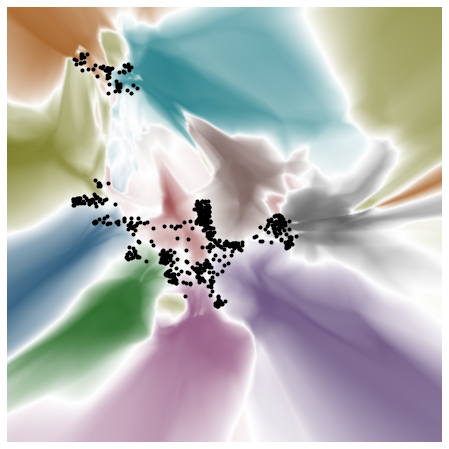

In [70]:
#visualize
img_save_location = os.path.join(mms.content_path, "img")

mms.customize_visualize(EPOCH, test_data[border], None, None, None,
                        os.path.join(img_save_location, "RQ_23_{:d}".format(EPOCH)), np.arange(-s, 0, 1))

In [71]:
sys.path.remove(content_path)

3. with boundary preserving properties, add B as reconstruction

In [72]:
content_path = "E:\\DVI_exp_data\\RQ1\\B_Recon"
sys.path.append(content_path)

from Model.model import *
net = resnet18()
classes = ("airplane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

mms = MMS(content_path, net, 100, 100, 1, 512, 10, classes, cmap="tab10", resolution=400, neurons=256,
          verbose=1, temporal=False, split=-1, advance_border_gen=True, attack_device="cuda:0")

Finish loading content!


In [73]:
# hyperparameters
EPOCH = 100

In [74]:
# 1. whether adversarial border points lying on boundaries?
# quantitative measure
border_points = mms.get_epoch_border_centers(EPOCH)
preds = mms.get_pred(EPOCH, border_points)
preds = preds + 1e-8

sort_preds = np.sort(preds)
diff = (sort_preds[:, -1] - sort_preds[:, -2]) / (sort_preds[:, -1] - sort_preds[:, 0])

border = np.zeros(len(diff), dtype=np.bool)
border[diff < 0.1] = 1
s = np.sum(border)
s

100%|██████████| 25/25 [00:00<00:00, 6267.26it/s]


1596

In [75]:
grid_view, decision_view =mms.get_epoch_decision_view(EPOCH, resolution=400)
grid_view = grid_view.reshape(-1, 2)
decision_view = decision_view.reshape(-1,3)
from sklearn.neighbors import NearestNeighbors
nbs = NearestNeighbors(n_neighbors=1, algorithm="ball_tree").fit(grid_view)

target_samples = border_points[border]
repr_2d = mms.batch_project(target_samples, EPOCH)
_, indices = nbs.kneighbors(repr_2d)
indices = indices.squeeze()
sample_colors = decision_view[indices]

c1 = np.zeros(indices.shape[0], dtype=np.bool)
c1[sample_colors[:,0]>0.85] = 1

c2 = np.zeros(indices.shape[0], dtype=np.bool)
c2[sample_colors[:,1]>0.85] = 1

c3 = np.zeros(indices.shape[0], dtype=np.bool)
c3[sample_colors[:,2]>0.85] = 1
c = np.logical_and(c1,c2)
c=np.logical_and(c, c3)

np.sum(c), len(c), np.sum(c)/len(c)

Computing decision regions ...
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000015490BF02B0>
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x00000155BC269400>


100%|██████████| 800/800 [00:00<00:00, 5242.74it/s]


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000015490BC4588>


(1197, 1596, 0.75)

E:\xianglin\git_space\DeepVisualInsight\deepvisualinsight\MMS.py:1000: MatplotlibDeprecationWarning: Setting the line's pick radius via set_picker is deprecated since 3.3 and will be removed two minor releases later; use set_pickradius instead.
  color=color, zorder=2, picker=mpl.rcParams['lines.markersize'])


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x00000155BC2587F0>
Computing decision regions ...
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001548C8B3240>
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001549901FC18>


100%|██████████| 800/800 [00:00<00:00, 5209.39it/s]


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000015490BC4048>


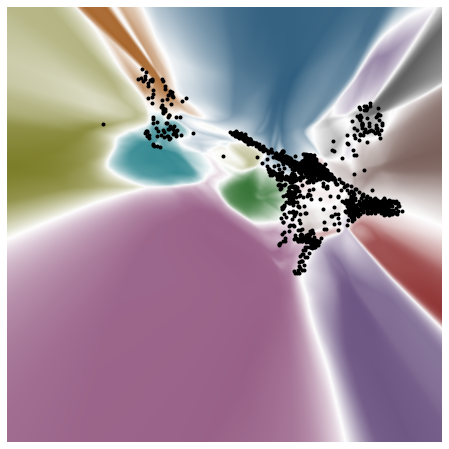

In [76]:
# visualize
img_save_location = os.path.join(mms.content_path, "img")
if not os.path.exists(img_save_location):
    os.mkdir(img_save_location)

mms.customize_visualize(EPOCH, target_samples, None, None, None,
                        os.path.join(img_save_location, "RQ_31_{:d}".format(EPOCH)), np.arange(-len(c), 0, 1))


In [77]:
#2. true samples on boundaries

training_data = mms.training_data
train_data = mms.get_representation_data(EPOCH, training_data)

preds = mms.get_pred(EPOCH, train_data)
preds = preds + 1e-8

sort_preds = np.sort(preds)
diff = (sort_preds[:, -1] - sort_preds[:, -2]) / (sort_preds[:, -1] - sort_preds[:, 0])

border = np.zeros(len(diff), dtype=np.bool)
border[diff < 0.1] = 1
s = np.sum(border)
s

100%|██████████| 250/250 [00:00<00:00, 4109.26it/s]


3051

In [78]:
# 2. if point lies on boundary, is the background white?
grid_view, decision_view =mms.get_epoch_decision_view(EPOCH, resolution=400)
grid_view = grid_view.reshape(-1, 2)
decision_view = decision_view.reshape(-1,3)
from sklearn.neighbors import NearestNeighbors
nbs = NearestNeighbors(n_neighbors=1, algorithm="ball_tree").fit(grid_view)

target_samples = train_data[border]
repr_2d = mms.batch_project(target_samples, EPOCH)
_, indices = nbs.kneighbors(repr_2d)
indices = indices.squeeze()
sample_colors = decision_view[indices]

c1 = np.zeros(indices.shape[0], dtype=np.bool)
c1[sample_colors[:,0]>0.85] = 1

c2 = np.zeros(indices.shape[0], dtype=np.bool)
c2[sample_colors[:,1]>0.85] = 1

c3 = np.zeros(indices.shape[0], dtype=np.bool)
c3[sample_colors[:,2]>0.85] = 1
c = np.logical_and(c1,c2)
c=np.logical_and(c, c3)

np.sum(c), len(c), np.sum(c)/len(c)

Computing decision regions ...
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001558480FAC8>
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000015584796470>


100%|██████████| 800/800 [00:00<00:00, 5277.25it/s]


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000015584776DA0>


(2269, 3051, 0.7436905932481154)

E:\xianglin\git_space\DeepVisualInsight\deepvisualinsight\MMS.py:1000: MatplotlibDeprecationWarning: Setting the line's pick radius via set_picker is deprecated since 3.3 and will be removed two minor releases later; use set_pickradius instead.
  color=color, zorder=2, picker=mpl.rcParams['lines.markersize'])


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001554E9B0160>
Computing decision regions ...
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001554E9A8710>
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x00000155A629A438>


100%|██████████| 800/800 [00:00<00:00, 5384.03it/s]


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001554E9A8F60>


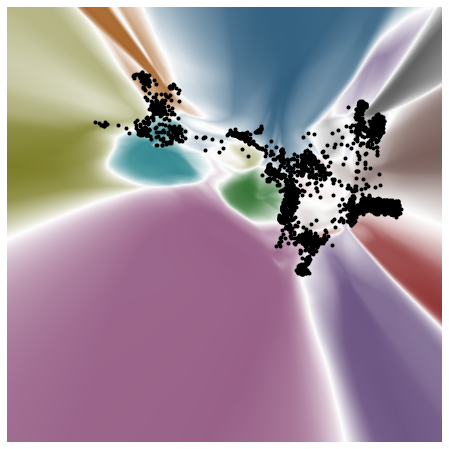

In [79]:
#visualize
img_save_location = os.path.join(mms.content_path, "img")

mms.customize_visualize(EPOCH, train_data[border], None, None, None,
                        os.path.join(img_save_location, "RQ_32_{:d}".format(EPOCH)), np.arange(-s, 0, 1))

In [80]:
# 3. test data

test_data = mms.get_epoch_test_repr_data(EPOCH)

preds = mms.get_pred(EPOCH, test_data)
preds = preds + 1e-8

sort_preds = np.sort(preds)
diff = (sort_preds[:, -1] - sort_preds[:, -2]) / (sort_preds[:, -1] - sort_preds[:, 0])

border = np.zeros(len(diff), dtype=np.bool)
border[diff < 0.1] = 1
s = np.sum(border)
s

100%|██████████| 50/50 [00:00<00:00, 5570.42it/s]


652

In [81]:
# 2. if point lies on boundary, is the background white?
grid_view, decision_view =mms.get_epoch_decision_view(EPOCH, resolution=400)
grid_view = grid_view.reshape(-1, 2)
decision_view = decision_view.reshape(-1,3)
from sklearn.neighbors import NearestNeighbors
nbs = NearestNeighbors(n_neighbors=1, algorithm="ball_tree").fit(grid_view)

target_samples = test_data[border]
repr_2d = mms.batch_project(target_samples, EPOCH)
_, indices = nbs.kneighbors(repr_2d)
indices = indices.squeeze()
sample_colors = decision_view[indices]

c1 = np.zeros(indices.shape[0], dtype=np.bool)
c1[sample_colors[:,0]>0.85] = 1

c2 = np.zeros(indices.shape[0], dtype=np.bool)
c2[sample_colors[:,1]>0.85] = 1

c3 = np.zeros(indices.shape[0], dtype=np.bool)
c3[sample_colors[:,2]>0.85] = 1
c = np.logical_and(c1,c2)
c=np.logical_and(c, c3)

np.sum(c), len(c), np.sum(c)/len(c)

Computing decision regions ...
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001548F5E1358>
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001554B118748>


100%|██████████| 800/800 [00:00<00:00, 5457.64it/s]


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x00000154999B19B0>


(485, 652, 0.7438650306748467)

E:\xianglin\git_space\DeepVisualInsight\deepvisualinsight\MMS.py:1000: MatplotlibDeprecationWarning: Setting the line's pick radius via set_picker is deprecated since 3.3 and will be removed two minor releases later; use set_pickradius instead.
  color=color, zorder=2, picker=mpl.rcParams['lines.markersize'])


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001549912B0F0>
Computing decision regions ...
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000015499138550>
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x00000155B2FCC908>


100%|██████████| 800/800 [00:00<00:00, 5278.09it/s]


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000015498B46080>


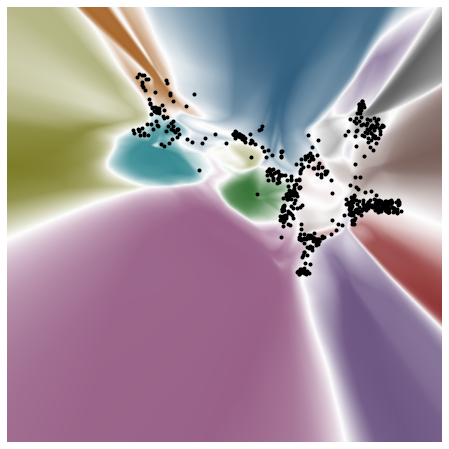

In [82]:
#visualize
img_save_location = os.path.join(mms.content_path, "img")

mms.customize_visualize(EPOCH, test_data[border], None, None, None,
                        os.path.join(img_save_location, "RQ_33_{:d}".format(EPOCH)), np.arange(-s, 0, 1))

In [83]:
sys.path.remove(content_path)